In [ ]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

--2021-06-27 14:33:55--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M  3.50MB/s    in 11s     

2021-06-27 14:34:07 (6.31 MB/s) - ‘/tmp/messy_vs_clean_room.zip’ saved [70392746/70392746]



In [ ]:
# melakukan ekstrasi pada file zip
import zipfile,os
local_zip = '/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir,'val')

In [ ]:
os.listdir('/tmp/images/train')
os.listdir('/tmp/images/val')

['clean', 'messy']

In [ ]:
# membuat direktori ruangan rapi pada direktori data training
train_clean_dir = os.path.join(train_dir,'clean')

# membuat direktori ruangan berantakan pada direktori data training
train_messy_dir = os.path.join(train_dir,'messy')

# membuat direktori ruangan rapi pada direktori data validasi
validation_clean_dir = os.path.join(validation_dir,'clean')

# membuat direktori ruangan berantakan pada direktori data validasi
validation_messy_dir = os.path.join(validation_dir,'messy')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range = 20,
                    horizontal_flip = True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range = 20,
                    horizontal_flip = True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  #direktori data latih
        target_size = (150,150),  # mengubah seluruh gambar menjadi 150x150 piksel
        batch_size = 4, #karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
      validation_dir, #direktori data validasi
      target_size = (150,150),  # mengubah seluruh gambar menjadi 150x150 piksel
        batch_size = 4, #karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode = 'binary')

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape = (150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')                               
])

In [ ]:
# compile model dengan 'adam' optimizer loss function 'binary_crossentropy'
model.compile(loss='binary_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics = ['accuracy'])

In [ ]:
# latih model dengan model.fit
model.fit(
      train_generator,
      steps_per_epoch = 25, # berapa batch yang akan diesksekusi pada setiap epoch
      epochs = 20, # tambahkan epochs jika akurasi model belum optimal
      validation_data = validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps = 5, # berapa batch yang akan dieksekusi pada setiap epoch
      verbose = 2)


Epoch 1/20
25/25 - 7s - loss: 0.7508 - accuracy: 0.5200 - val_loss: 0.6750 - val_accuracy: 0.5000
Epoch 2/20
25/25 - 6s - loss: 0.6767 - accuracy: 0.5600 - val_loss: 0.7024 - val_accuracy: 0.5000
Epoch 3/20
25/25 - 6s - loss: 0.7078 - accuracy: 0.5500 - val_loss: 0.6409 - val_accuracy: 0.6500
Epoch 4/20
25/25 - 6s - loss: 0.6616 - accuracy: 0.7500 - val_loss: 0.6062 - val_accuracy: 0.7500
Epoch 5/20
25/25 - 6s - loss: 0.6367 - accuracy: 0.6200 - val_loss: 0.5006 - val_accuracy: 0.7500
Epoch 6/20
25/25 - 6s - loss: 0.6553 - accuracy: 0.6700 - val_loss: 0.7097 - val_accuracy: 0.5000
Epoch 7/20
25/25 - 6s - loss: 0.6840 - accuracy: 0.6100 - val_loss: 0.6711 - val_accuracy: 0.6500
Epoch 8/20
25/25 - 6s - loss: 0.6350 - accuracy: 0.6800 - val_loss: 0.6386 - val_accuracy: 0.6500
Epoch 9/20
25/25 - 6s - loss: 0.6459 - accuracy: 0.6100 - val_loss: 0.5544 - val_accuracy: 0.7500
Epoch 10/20
25/25 - 6s - loss: 0.5492 - accuracy: 0.7300 - val_loss: 0.7075 - val_accuracy: 0.6500
Epoch 11/20
25/25 -

Saving 3.png to 3.png
3.png
messy


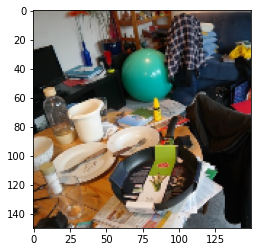

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 10)

  print(fn)
  if classes == 0:
    print('clean')
  else:
    print('messy')